# Clique Complexes

## Generating the filtration edges for a random graph

In [1]:
from graph_gen import * 
from visualize_tools import *
from simplicial import *
import math

In [2]:
N = 10
random_graph_matrix = generate_random_graph_matrix(N)
off_diag = get_off_diagonal_entries(random_graph_matrix)
edge_filtration = get_edge_filtration(off_diag)

[((3, 7), 0.10865400840989942),
 ((3, 9), 0.14942659008749332),
 ((0, 7), 0.16736539849244314),
 ((7, 8), 0.20907589120232606),
 ((6, 8), 0.221807718782019),
 ((2, 9), 0.2504089202511567),
 ((5, 6), 0.2729116960420309),
 ((0, 5), 0.2927972466985193),
 ((1, 9), 0.3244047625417356),
 ((0, 8), 0.33121177177749245),
 ((0, 9), 0.334282060942561),
 ((0, 4), 0.34450362719463906),
 ((4, 7), 0.3548695110368987),
 ((5, 9), 0.35677820385953973),
 ((2, 7), 0.3692721500242405),
 ((1, 5), 0.3845287176514938),
 ((3, 5), 0.42532567356562173),
 ((8, 9), 0.4254776356522197),
 ((1, 4), 0.42658543133672644),
 ((3, 8), 0.4411559447777983),
 ((2, 3), 0.4458654317138838),
 ((2, 8), 0.45402313785470566),
 ((0, 6), 0.4540813158765899),
 ((0, 3), 0.4781833301129287),
 ((5, 8), 0.4918495465216928),
 ((3, 4), 0.5105211585901948),
 ((1, 8), 0.5477583172221105),
 ((2, 6), 0.5594477443031085),
 ((4, 8), 0.5699066846109138),
 ((0, 2), 0.577887458462111),
 ((2, 5), 0.5853145744934565),
 ((3, 6), 0.5905457202097437),
 

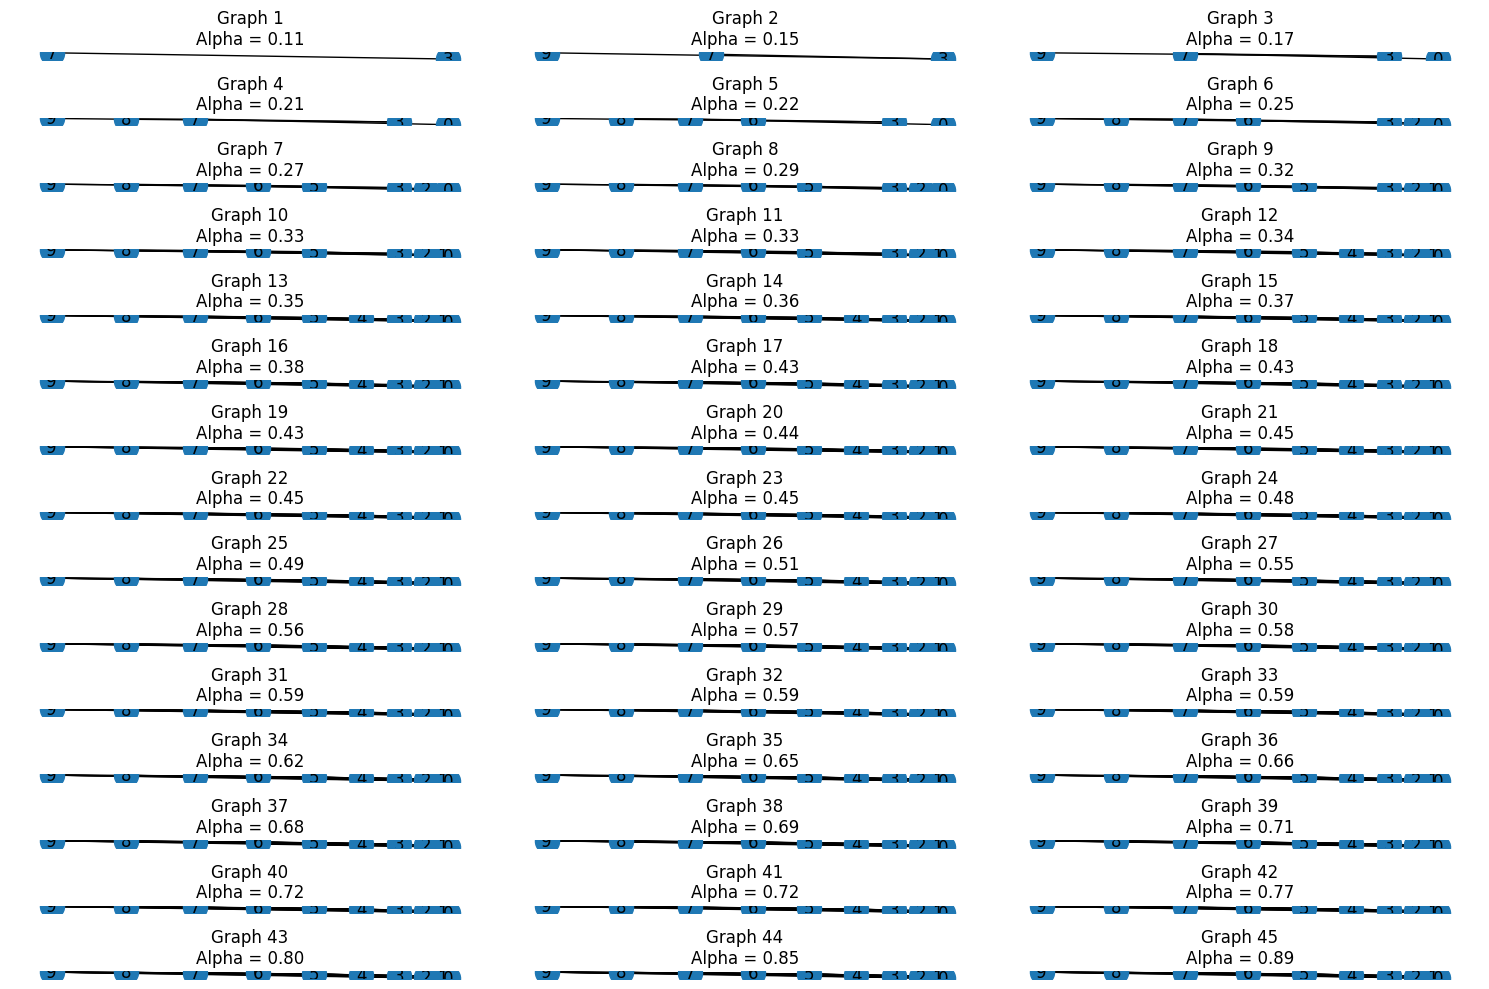

In [3]:
import matplotlib.pyplot as plt  # Optional for visualization
from IPython.display import display, HTML

# Create an empty list to store the graphs
graphs = []

# Initialize an empty graph
G = nx.Graph()

fixed_positions = generate_ngon_points(len(edge_filtration))

for edge, value in edge_filtration:
    G.add_edge(*edge)
    # You can add optional visualization code here to display the graph at each step
    # nx.draw(G, with_labels=True)
    # plt.show()
    pos = fixed_positions 
    graphs.append(G.copy())

num_graphs = len(edge_filtration)
num_cols = min(num_graphs, 3)
num_rows = (num_graphs + num_cols - 1) // num_cols

fig, ax = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for i, (edge, value) in enumerate(edge_filtration):
    G.add_edge(*edge)
    graphs.append(G.copy())

    # Optional: Visualize the graphs
    row, col = divmod(i, num_cols)
    nx.draw(graphs[i], with_labels=True, pos=pos, ax=ax[row, col])
    ax[row, col].set_title(f"Graph {i+1}\nAlpha = {value:.2f}")

# Remove empty subplots if there are fewer graphs than expected
for i in range(num_graphs, num_rows * num_cols):
    fig.delaxes(ax.flat[i])
    
plt.tight_layout()  # Ensure the graphs don't overlap
plt.show()

In [4]:
# Create an empty list to store the graphs
graphs = []

# Initialize an empty graph
G = nx.Graph()

for edge, value in edge_filtration:
    G.add_edge(*edge)
    graphs.append(G.copy())



In [5]:
if len(graphs) != len(edge_filtration):
    raise ValueError("Sizes of graph and filtration don't match")

graph_filtration = []

for n, graph in enumerate(graphs):
    graph_filtration.append((edge_filtration[n][1], graph))

In [8]:
clique_filtration = []

for n, graph in enumerate(graph_filtration):
    current_cliques = nx.enumerate_all_cliques(graph[1])
    current_clique_simplices = []
    for clique in current_cliques:
        if len(clique)>2:
            current_clique_simplices.append(clique)
    clique_filtration.append((graph_filtration[n], current_clique_simplices))

In [9]:
complex_filtration = []

clique_complex = SimplicialComplex()

for n in range(N):
    clique_complex.addSimplex(id=n)

edges_used = []
cliques_used = []

for alpha_n in clique_filtration:
    edges = alpha_n[0][1].edges
    for edge in edges:
        if list(edge) in edges_used:
            pass
        else:
            clique_complex.addSimplexWithBasis(bs = list(edge))
            edges_used.append(list(edge))
    cliques = alpha_n[1]
    for clique in cliques:
        if list(clique) in cliques_used:
            pass
        else:
            # TODO Make this work for cliques of dimension 4 and higher.
            clique_complex.addSimplexWithBasis(bs =list(clique))
            cliques_used.append(list(clique))
    complex_filtration.append((alpha_n[0][0], clique_complex.copy()))

In [16]:
betti_curve = []

for complex in complex_filtration:
    current_betti_numbers = complex[1].bettiNumbers()
    if len(current_betti_numbers) < 3:
        current_betti_numbers[2]=0
    betti_curve.append((complex[0],current_betti_numbers))

In [19]:
import matplotlib.pyplot as plt

def plot_betti_curves(test_betti):
    # Create a list of unique x-coordinates
    x_values = [x[0] for x in test_betti]
    
    # Initialize a color map for distinguishing curves
    color_map = plt.get_cmap('viridis')
    
    # Create a figure and axis
    fig, ax = plt.subplots()

    y0 = [y[1][0] for y in test_betti]
    y1 = [y[1][1] for y in test_betti]
    y2 = [y[1][2] for y in test_betti]

    # # Plot each curve with a unique color
    # for i, (alpha, y_values) in enumerate(test_betti):
    #     y = [y_values[1], y_values[2]]
    #     color = color_map(i / len(test_betti))  # Get a unique color
    #     label = f'Time = {alpha}'
    # ax.plot(x_values, y0, label="B0", color="blue")
    ax.plot(x_values, y1, label="B1", color="purple")
    ax.plot(x_values, y2, label="B2", color="red")

    # Set labels and legend
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Betti Curves')
    ax.legend()
    
    # Show the plot
    plt.show()


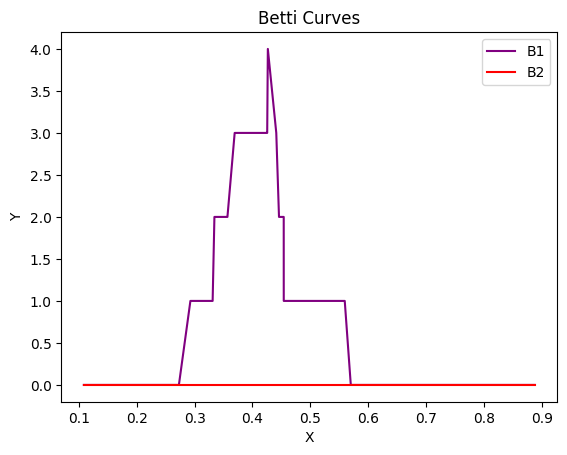

In [20]:
plot_betti_curves(betti_curve)